In [1]:
%reload_ext autoreload
%autoreload 2
import matplotlib.pylab as plt    # load plotting library
import numpy as np
from src.constants import *
from src.gp_profile_fit import *
from src.db_handler import DB_handler
from scipy.interpolate import interp1d
from src.data_handlers.idf_handler import IDF_handler
from src.data_handlers.meq_handler import MEQ_handler
from src.data_handlers.powerbalance_handler import Powerbalance_handler as P_handler
#%matplotlib widget

13:45:48 | aug_sfutils | INFO: Using version 0.8.0
Traceback (most recent call last):
  File "/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/aug_sfutils/__init__.py", line 39, in <module>
    from .journal import *
ModuleNotFoundError: No module named 'aug_sfutils.journal'
13:45:49 | aug_sfutils.sfh | WARNING: journal not loaded
13:45:49 | aug_sfutils.mapeq | INFO: AUG-SF home /afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/aug_sfutils


In [20]:
shot = 39002
idf = IDF_handler(shot, exp="augd")
meq = MEQ_handler(shot, idf)

18:18:59 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3900/L1/IDF/39002.1
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:230: RuntimeWarning: divide by zero encountered in true_divide
  q_sa_shear[i, :] = q**2 * a**2 / r**2 * np.gradient(q, r)
18:19:00 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3900/L1/EQH/39002.1
18:19:01 | aug_sfutils.sf2equ | INFO: Reading equ scalars
18:19:01 | aug_sfutils.sf2equ | INFO: Reading equ 1d profiles
18:19:02 | aug_sfutils.sf2equ | INFO: Reading equ PFM
18:19:02 | aug_sfutils.sf2equ | INFO: COCO 17


In [21]:
time = 2
tidx = np.abs(idf.timebase-time).argmin()

triangularity_raw = meq.get_triangularity()
triangularity_raw_raw = meq.get_triangularity(mode="raw")
triangularity_shear_raw = meq.get_triangularity_shear(triangularity_raw, False)

triangularity_smooth = meq.smooth_profile(triangularity_raw, l=1)
triangularity_shear_smooth = meq.get_elongation_shear(triangularity_smooth)


/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/meq_handler.py:140: RuntimeWarning: invalid value encountered in double_scalars
  upper_tri = (r_major - max_z_R)/r_minor
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/meq_handler.py:141: RuntimeWarning: invalid value encountered in double_scalars
  lower_tri = (r_major - min_z_R)/r_minor
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/meq_handler.py:176: RuntimeWarning: Mean of empty slice.
  row[start:stop] = row[start:stop].mean()
/afs/.ipp/tok/soft/anaconda/3/2022.05/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


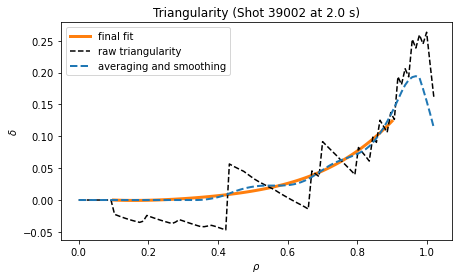

In [22]:
plt.figure(figsize=(7,4))
plt.plot(meq.rhobase_gp_fit[tidx], triangularity_smooth[tidx], color="tab:orange", lw=3, label="final fit")
plt.plot(meq.rhobase[tidx], triangularity_raw_raw[tidx], "--", c="black", label="raw triangularity")
plt.plot(meq.rhobase[tidx], triangularity_raw[tidx], "--", lw=2, label="averaging and smoothing")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\delta$")

plt.title(f"Triangularity (Shot {shot} at {float(idf.timebase[tidx]):.1f} s)")
plt.legend()
plt.savefig("../Thesis/Chapters/4-Implementation/img/triangularity.png")

In [13]:
t1 = 0.58
shot1 = 34886
idf1 = IDF_handler(shot1, exp="augd")
tidx1 = np.abs(idf1.timebase-t1).argmin()
shot2 = 37912
idf2 = IDF_handler(shot2, exp="augd")
t2 = 1.035
tidx2 = np.abs(idf2.timebase-t2).argmin()

18:14:56 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3488/L1/IDF/34886.1
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:230: RuntimeWarning: divide by zero encountered in true_divide
  q_sa_shear[i, :] = q**2 * a**2 / r**2 * np.gradient(q, r)
18:14:57 | aug_sfutils.sfread | INFO: Fetching SF /afs/ipp-garching.mpg.de/home/a/augd/shots/3791/L1/IDF/37912.1
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:268: RuntimeWarning: invalid value encountered in log
  cl1 = 24 - 0.5*np.log(ne/1e6) + np.log(Te)
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:253: RuntimeWarning: invalid value encountered in sqrt
  cs = np.sqrt(1.602e-19 * self.te / (2 * 1.672e-27))
/afs/ipp-garching.mpg.de/home/k/komo/Nextcloud/Studium/master-thesis/Code/src/data_handlers/idf_handler.py:256: RuntimeWar

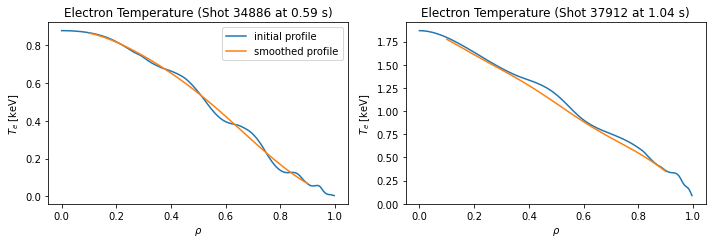

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3.5))


ax1.set_title(f"Electron Temperature (Shot {shot1} at {float(idf1.timebase[tidx1]):.2f} s)")
ax1.plot(idf1.rhobase_cde[tidx1], idf1.te_raw[tidx1]/1000, label="initial profile")
ax1.plot(idf1.rhobase_gp_fit[tidx1], idf1.te[tidx1]/1000, label="smoothed profile")
ax1.set_ylabel(r"$T_e$ [keV]")
ax1.set_xlabel(r"$\rho$")
ax1.legend()

ax2.set_title(f"Electron Temperature (Shot {shot2} at {float(idf2.timebase[tidx2]):.2f} s)")
ax2.plot(idf2.rhobase_cde[tidx2], idf2.te_raw[tidx1]/1000)
ax2.plot(idf2.rhobase_gp_fit[tidx2], idf2.te[tidx1]/1000)
ax2.set_ylabel(r"$T_e$ [keV]")
ax2.set_xlabel(r"$\rho$")
plt.tight_layout()

plt.savefig("../Thesis/Chapters/4-Implementation/img/profile_smoothing.png")

In [4]:
db = DB_handler("db5august.feather")

In [8]:
db["shot_number"]

0        32214
1        32214
2        32214
3        32214
4        32214
         ...  
12367    32305
12368    32305
12369    32305
12370    32305
12371    32305
Name: shot_number, Length: 12372, dtype: int64